# Project on House Price Prediction using Regression Analysis 

## Importing libraries

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

## Data Import

In [2]:
data=pd.read_csv(r"C:\Users\justw\Downloads\Machine Learning with Python\AA Project\Project on House Price Prediction using Regression Analysis\kc_house_data.csv")
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900         3       1.00         1180      5650     1.0          3   
1  538000         3       2.25         2570      7242     2.0          3   
2  180000         2       1.00          770     10000     1.0          3   
3  604000         4       3.00         1960      5000     1.0          5   
4  510000         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  zipcode      lat     long  \
0      7        1180              0      1955    98178  47.5112 -122.257   
1      7        2170            400      1951    98125  47.7210 -122.319   
2      6         770              0      1933    98028  47.7379 -122.233   
3      7        1050            910      1965    98136  47.5208 -122.393   
4      8        1680              0      1987    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

## Exploratory Data Analysis

In [3]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900         3       1.00         1180      5650     1.0          3   
1  538000         3       2.25         2570      7242     2.0          3   
2  180000         2       1.00          770     10000     1.0          3   
3  604000         4       3.00         1960      5000     1.0          5   
4  510000         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  zipcode      lat     long  \
0      7        1180              0      1955    98178  47.5112 -122.257   
1      7        2170            400      1951    98125  47.7210 -122.319   
2      6         770              0      1933    98028  47.7379 -122.233   
3      7        1050            910      1965    98136  47.5208 -122.393   
4      8        1680              0      1987    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
data.tail()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
21608  360000         3       2.50         1530      1131     3.0          3   
21609  400000         4       2.50         2310      5813     2.0          3   
21610  402101         2       0.75         1020      1350     2.0          3   
21611  400000         3       2.50         1600      2388     2.0          3   
21612  325000         2       0.75         1020      1076     2.0          3   

       grade  sqft_above  sqft_basement  yr_built  zipcode      lat     long  \
21608      8        1530              0      2009    98103  47.6993 -122.346   
21609      8        2310              0      2014    98146  47.5107 -122.362   
21610      7        1020              0      2009    98144  47.5944 -122.299   
21611      8        1600              0      2004    98027  47.5345 -122.069   
21612      7        1020              0      2008    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357

In [5]:
data.sample(7)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
3970   122000         2       1.00          730      6728     1.0          3   
8109   440000         6       3.00         2510      5310     1.0          4   
11229  395000         2       1.00         1200      6014     1.0          4   
21449  650000         4       2.50         2210      4861     2.0          3   
7010   465000         3       1.50         1460      9879     1.0          3   
17261  280000         4       2.75         2230     10160     1.0          3   
21401  438000         2       1.00          980      1179     2.0          3   

       grade  sqft_above  sqft_basement  yr_built  zipcode      lat     long  \
3970       6         730              0      1953    98148  47.4275 -122.324   
8109       7        1460           1050      1944    98108  47.5533 -122.304   
11229      6         600            600      1949    98118  47.5357 -122.280   
21449      9        2210              0      2013    98117  47.6959 -122.364   
7010       7        1460              0      1956    98008  47.6346 -122.127   
17261      7        1400            830      1968    98168  47.5123 -122.320   
21401      8         980              0      2010    98119  47.6381 -122.375   

       sqft_living15  sqft_lot15  
3970            1170        7034  
8109            1390        5407  
11229           1270        4652  
21449           1590        5080  
7010            1610       10050  
17261           1740       10080  
21401           1190        1600

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.6 MB


## Univariate Analysis 

In [7]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors     condition         grade    sqft_above  sqft_basement  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean       1.494309      3.409430      7.656873   1788.390691     291.509045   
std        0.539989      0.650743      1.175459    828.090978     442.575043   
min        1.000000      1.000000      1.000000    290.000000       0.000000   
25%        1.000000      3.000000      7.000000   1190.000000       0.000000   
50%        1.500000      3.000000      7.000000   1560.000000       0.000000   
75%        2.000000      4.000000      8.000000   2210.000000     560.000000   
max        3.500000      5.000000     13.000000   9410.000000    4820.000000   

           yr_built       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean    1971.005136  98077.939805     47.560053   -122.213896    1986.552492   
std       29.373411     53.505026      0.138564      0.140828     685.391304   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1951.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%     1975.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%     1997.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000

## Identify & Treatment of Outliers

<AxesSubplot:>

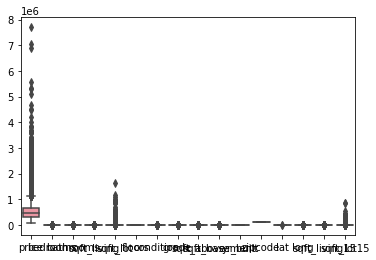

In [8]:
sns.boxplot(data=data)

In [9]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

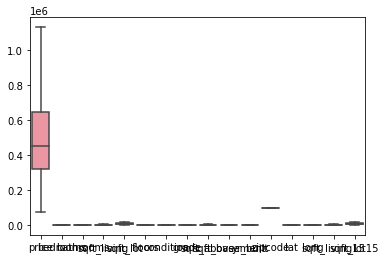

In [10]:
sns.boxplot(data=data)

* Outliers Treated Successfully. No Any Outlires seen in data.

In [11]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.115873e+05      3.362791      2.098477   2058.078564   8705.224448   
std    2.500026e+05      0.854105      0.722027    839.307806   5046.482073   
min    7.500000e+04      1.500000      0.625000    290.000000    520.000000   
25%    3.219500e+05      3.000000      1.750000   1427.000000   5040.000000   
50%    4.500000e+05      3.000000      2.250000   1910.000000   7618.000000   
75%    6.450000e+05      4.000000      2.500000   2550.000000  10688.000000   
max    1.129575e+06      5.500000      3.625000   4234.500000  19160.000000   

             floors     condition         grade    sqft_above  sqft_basement  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean       1.494309      3.410124      7.598598   1769.563041     284.050155   
std        0.539989      0.648435      1.001234    764.029323     417.064559   
min        1.000000      1.500000      5.500000    290.000000       0.000000   
25%        1.000000      3.000000      7.000000   1190.000000       0.000000   
50%        1.500000      3.000000      7.000000   1560.000000       0.000000   
75%        2.000000      4.000000      8.000000   2210.000000     560.000000   
max        3.500000      5.000000      9.500000   3740.000000    1400.000000   

           yr_built       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean    1971.005136  98077.939805     47.560053   -122.214908    1975.112849   
std       29.373411     53.505026      0.138563      0.137209     648.999108   
min     1900.000000  98001.000000     47.160500   -122.519000     399.000000   
25%     1951.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%     1975.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%     1997.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.820500    3665.000000   

         sqft_lot15  
count  21613.000000  
mean    8298.152917  
std     4363.479209  
min      651.000000  
25%     5100.000000  
50%     7620.000000  
75%    10083.000000  
max    17557.500000

## Checking Missing Values

In [12]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* No Missing Values are present in data.

## Data Visualization

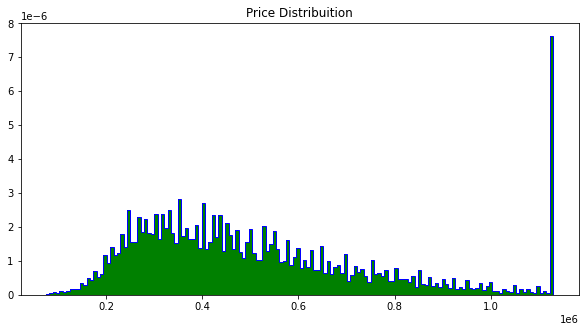

In [13]:
plt.figure(figsize =(10, 5))
plt.title('Price Distribuition')
plt.hist(data.price , bins =150 , color = "g" ,density =True)
plt.hist(data.price , bins =150 , color = "b" ,density =True , histtype='step' )
plt.show()

<AxesSubplot:xlabel='floors', ylabel='price'>

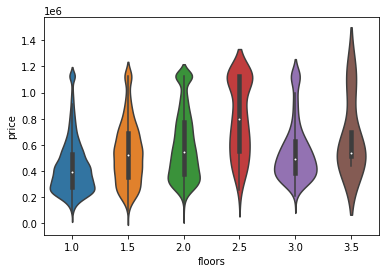

In [14]:
sns.violinplot(data =data,x = "floors" ,y ="price")

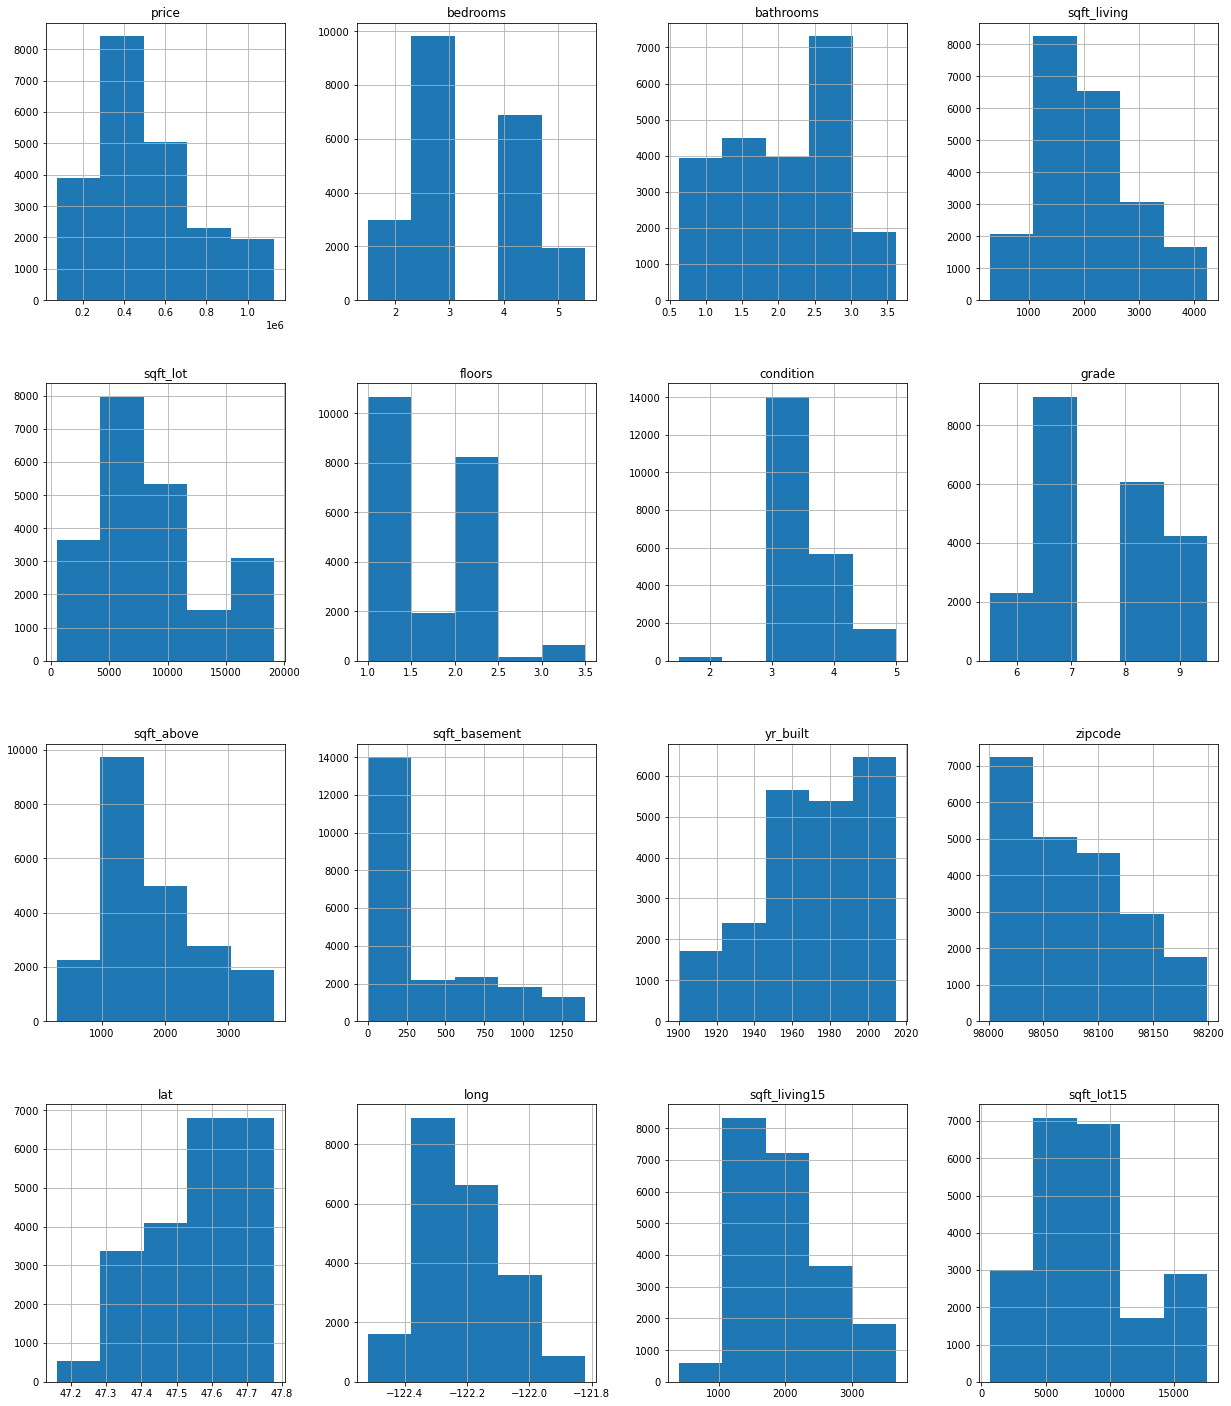

In [15]:
data.hist(bins=5, figsize=(21,25))
plt.show()

In [16]:
#sns.scatterplot(x='carat',y='price',data=data)

In [17]:
#sns.scatterplot(x='depth',y='price',data=data)

In [18]:
#sns.scatterplot(x='table',y='price',data=data)

In [19]:
#sns.scatterplot(x='height',y='price',data=data)

In [20]:
#sns.scatterplot(x='length',y='price',data=data)

In [21]:
#sns.scatterplot(x='width',y='price',data=data)

In [22]:
#sns.distplot(data=data)

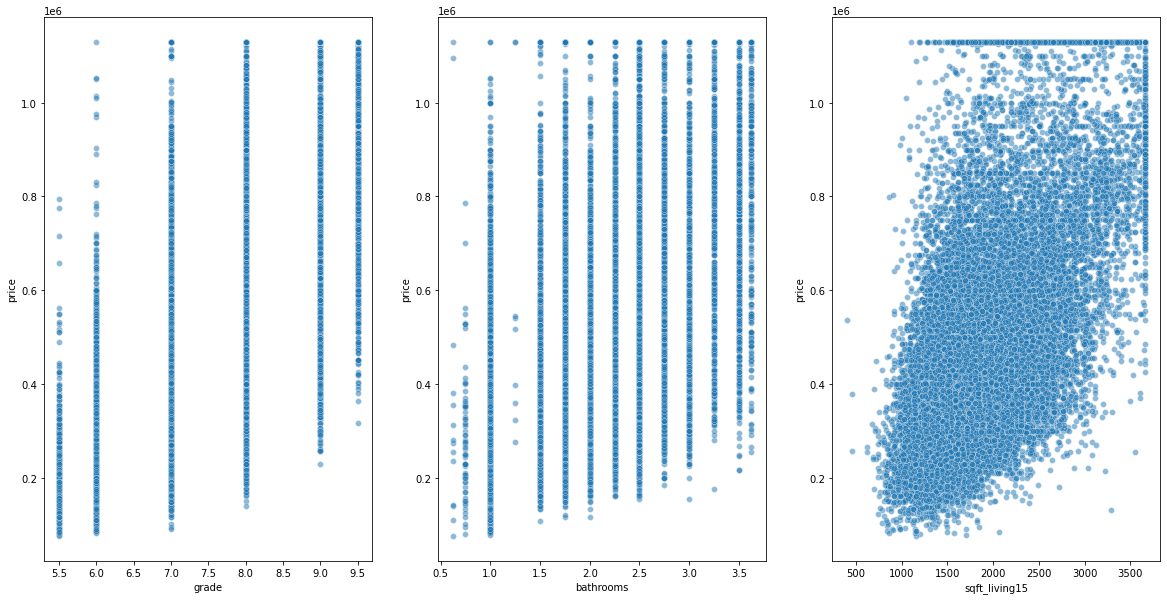

In [23]:
fig, axes = plt.subplots(1, 3, figsize = (20,10));

sns.scatterplot(y="price", x="grade", data=data, ax=axes[0], alpha=0.5);
sns.scatterplot(y="price", x="bathrooms", data=data, ax=axes[1], alpha=0.5);
sns.scatterplot(y="price", x="sqft_living15", data=data, ax=axes[2], alpha=0.5);

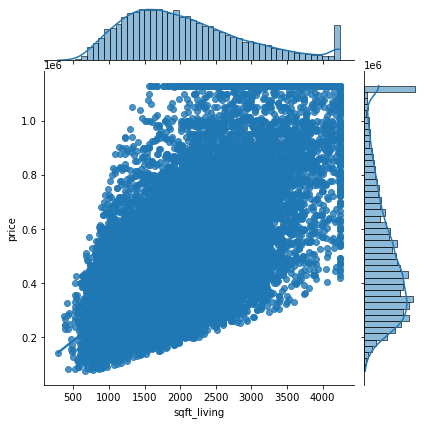

In [24]:
sns.jointplot(x="sqft_living", y="price", data=data[["sqft_living", "price"]], kind="reg")

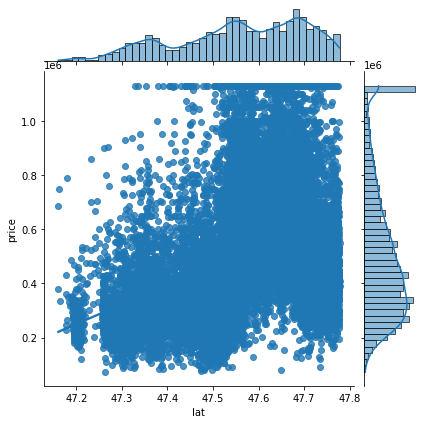

In [25]:
 sns.jointplot(x="lat", y="price", data=data[["lat", "price"]], kind="reg")

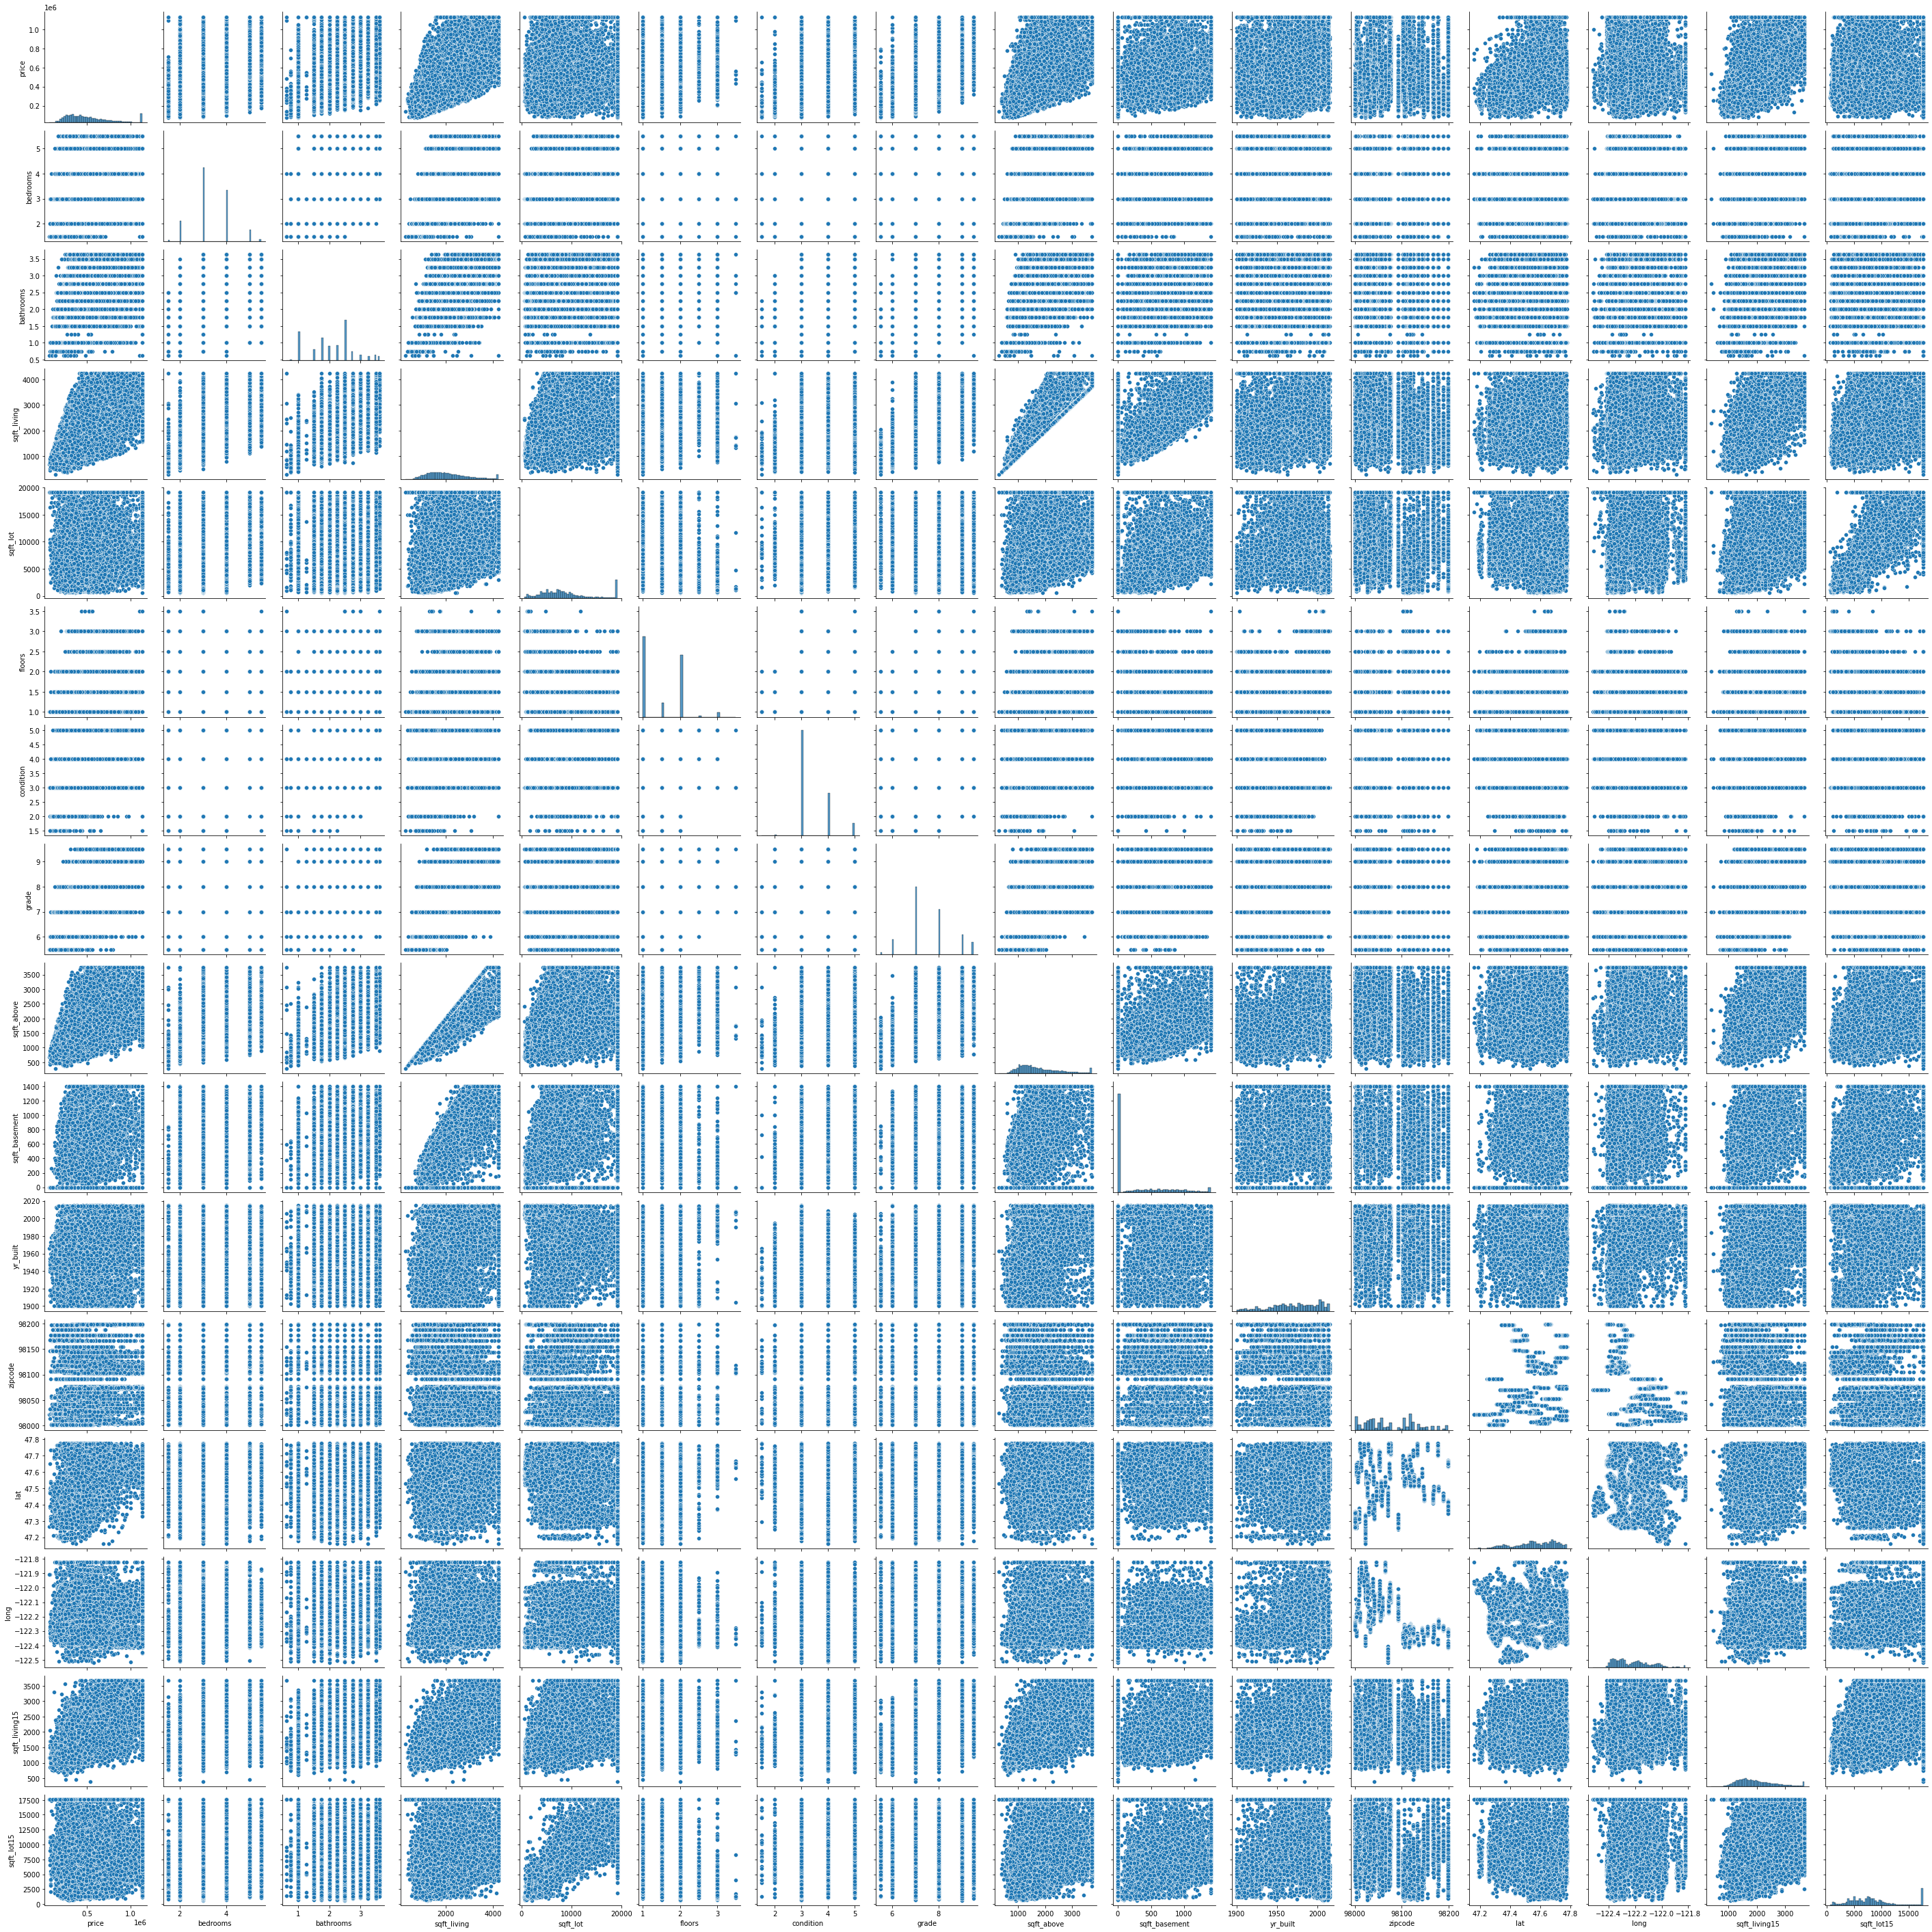

In [26]:
sns.pairplot(data=data)

In [ ]:
sns.pairplot(data, diag_kind="kde")

## Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [ ]:
data.head()

## Data partition

In [ ]:
# Putting feature variable to X
x= data.drop('price', axis= 1)

# Putting response variable to y
y = data[['price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, train_size=0.7 ,random_state=120)

# Linear Regression Model

In [ ]:
df = pd.concat([y_train, x_train], axis=1)
df.head()

## Correlation Matrix

In [ ]:
df.corr()

#### Correlation Of All Columns With Target Variable. More The Value Is Away From Zero, More The Feature Importance

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
#sns.heatmap(df.corr(),annot=True)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), fmt=".2g", annot=True);

In [ ]:
corr_mat=df.corr()
plt.figure(figsize=(10,5))
corr_mat['price'].sort_values(ascending=False).plot(kind='bar')

### Create A Distplot with Price Column

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['price'],kde=True);

In [ ]:
df.plot.scatter(x='sqft_living', y='price', title='price vs sqft_living')

#### HarvestedAcres have 89% strong positve correlation with Value
* HarvestedAcres have high impact on Value
* There is colinearity in data, So every platform is independent

## Multicolinearity (With the help of VIF)

In [ ]:
X1=df.drop(['price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

* No collinearity in the data

# Model Building

##### H0 :- There is no Linear relationship between price and sqft_living , grade & newspaper

##### Vs

##### H1 :- There is Linear relationship between sales and tv , radio & newspaper

##### Alpha = 0.05 (5%)

In [ ]:
df.columns

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ bedrooms + bathrooms +condition+floors+grade+ sqft_living + sqft_lot+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15',data=df).fit()
model.summary()

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ bedrooms + bathrooms +condition+floors+grade+ sqft_living +yr_built+zipcode+lat+long+sqft_living15',data=df).fit()
model.summary()

# Multicolinearity (With the help of VIF)

In [ ]:
X1=df.drop(['price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [ ]:
df.head()

In [ ]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

### Linearity¶

In [ ]:
df.plot.scatter(x='sqft_living', y='price', title='price vs sqft_living')

### Homoscedasicity

In [ ]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

### Normality

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

### Model Error are IID

In [ ]:
df['residual'].plot.hist()

In [ ]:
ax=sns.distplot(df.residual)

## Prediction on Test Data (unseen data)

In [ ]:
df_test=pd.concat([x_test,y_test],axis=1)

df_test.head()

In [ ]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

## Test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.price, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

## Train

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df.price, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

* Model is good fit & Performance on Test data is also good fit 

# Decision Tree Model

In [ ]:
data.head()

### Taking subset data of Number

In [ ]:
data.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
numvariable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
numvariable.head(3)

In [ ]:
numvariable.head()

### Data Partition

In [ ]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = numvariable.drop(['price'],axis=1)
Y = numvariable[['price']]

# Train test split

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3,random_state=231)

### Model Building

In [ ]:
def model_train(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    trainpred=model.predict(X_train)
    testpred = model.predict(X_test)
    print("R2 Score for train data :", r2_score(Y_train, trainpred))
    print("R2 Score for test  data :", r2_score(Y_test, testpred))
    #print("Mean Squared Error for train data :", mean_squared_error(Y_train, trainpred))
    #print("Mean Squared Error for test data :", mean_squared_error(Y_test, testpred))
    #print("Root Mean Squared Error for train data :", mean_squared_error(Y_train, trainpred)**0.5)
    #print("Root Mean Squared Error for test data :", mean_squared_error(Y_test, testpred)**0.5)

    #sns.regplot(y_test, testpred)

In [ ]:
model=DecisionTreeRegressor(max_depth=4, random_state=1234)
model_train(model, X_train, X_test, Y_train, Y_test)

## Plotting the Tree

## Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [ ]:
train=pd.concat([Y_train,X_train],axis=1)
train.head()

In [ ]:
independent_variable = list(train.columns[1:])
independent_variable

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(model,  feature_names = independent_variable,  # column name
                # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

## Predictions on Train Dataset

In [ ]:
train.head()

In [ ]:
train['Predicted']=model.predict(X_train)  # MODEL = dt
train.head()

## Predictions on Test Dataset

In [ ]:
test=pd.concat([X_test,Y_test],axis=1)
test.head()

In [ ]:
test['Predicted']=model.predict(X_test)
test.head()

## Accuracy of Train and Test Dataset

In [ ]:
model_train(model, X_train, X_test, Y_train, Y_test)

### Grid Search Method

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [200, 400,500,100,300,600], ## Parent 
           'min_samples_leaf': [70,100,80,200,50,90], ## Child or Leave 
           'max_depth':[4,5,6,8,2,1]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, Y_train)

In [ ]:
grid_search_cv.best_estimator_

# Random Forest Model

In [ ]:
numvariable.head()

In [ ]:
model=RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=20)
model_train(model, X_train, X_test, Y_train, Y_test)

### Importance Features

In [ ]:
# Plot features importances
imp = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


### Random Forest Visualization

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [ ]:
tree = model.estimators_[1]
# specify the tree number   
# Export the image to a dot file
feature_list = list(X.columns)  # all independent variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

## Predictions on Train Dataset

In [ ]:
Train=pd.concat([X_train,Y_train],axis=1)
Train.head()

In [ ]:
Train['Prediction']=model.predict(X_train)
Train.head()

## Predictions on Test Dataset

In [ ]:
Test=pd.concat([X_test,Y_test],axis=1)
Test.head()

In [ ]:
Test['Prediction']=model.predict(X_test)
Test.head()

## Accuracy of Train and  Test Model

In [ ]:
model=RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=20)
model_train(model, X_train, X_test, Y_train, Y_test)

# K-Nearest Neighbour Model

In [ ]:
numvariable.head()

## Model Building

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5)
model_train(model, X_train, X_test, Y_train, Y_test)

## Predictions on Train Dataset

In [ ]:
knntrain=pd.concat([X_train,Y_train],axis=1)
knntrain.head()

In [ ]:
knntrain['prediction']=model.predict(X_train)
knntrain.head()

### Predictions on Test Dataset

In [ ]:
knntest=pd.concat([X_test,Y_test],axis=1)
knntest.head()

In [ ]:
knntest['prediction']=model.predict(X_test)
knntest.head()

## Accuracy of Train and Test Model

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)
model_train(model, X_train, X_test, Y_train, Y_test)

# Support Vector Regressor

In [ ]:
numvariable.head()

In [ ]:
from sklearn.svm import SVR
#from sklearn.svm import LinearSVC
model = SVR(kernel="linear")  # if we use linear then only we get support_vector
model.fit(X_train,Y_train)
#model_train(model, X_train, X_test, Y_train, Y_test)


In [ ]:
model_train(model, X_train, X_test, Y_train, Y_test)

## Predictions on Train Dataset

In [ ]:
svrtrain=pd.concat([X_train,Y_train],axis=1)
svrtrain.head()

In [ ]:
svrtrain['prediction']=model.predict(X_train)
svrtrain.head()

 ## Prediction on Test Dataset

In [ ]:
svrtest=pd.concat([X_test,Y_test],axis=1)
svrtest.head()

In [ ]:
svrtest['prediction']=model.predict(X_test)
svrtest.head()

## Accuracy of Train and Test

In [ ]:
model_train(model, X_train, X_test, Y_train, Y_test)

# Enseble Techniques - XGBoost Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
model = XGBRegressor()

In [ ]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6]} #parent 

In [ ]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBRegressor(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, Y_train)  ## Model building

In [ ]:
print('The best parameter are -', gscv.best_params_)

In [ ]:
# Re-fit the model with the best parameters
final_mod = XGBRegressor(**gscv.best_params_)
final_mod.fit(X_train, Y_train)

In [ ]:
parent_params = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_params = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

In [ ]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_params,
               leaf_node_params=child_params)

## Prediction on Train Dataset

In [ ]:
xgbtrain=pd.concat([X_train,Y_train],axis=1)
xgbtrain

In [ ]:
xgbtrain['prediction']=final_mod.predict(X_train)
xgbtrain.head()

## Prediction on Test Data set

In [ ]:
xgbtest=pd.concat([X_test,Y_test],axis=1)
xgbtest

In [ ]:
xgbtest['prediction']=final_mod.predict(X_test)
xgbtest.head()

## Accuracy of Train and Test

In [ ]:
model_train(model, X_train, X_test, Y_train, Y_test)


## Importance Features 

In [ ]:
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

# Final Prediction

# Finished...!